In [1]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
import numpy as np
pd.options.display.max_columns = None # Shows all columns
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True) # For notebook use
cf.go_offline() # For offline use

In [2]:
print(__version__) # requires version >= 1.9.0

3.4.1


In [3]:
# ========================================
# IMPORT DATAFRAME
# ========================================
df = pd.read_csv('data/df02.csv', sep=',', na_filter=False, index_col=0, parse_dates=['launched_at'])

In [4]:
df.shape

(141447, 212)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141447 entries, 0 to 141446
Columns: 212 entries, launch_state to ZW
dtypes: datetime64[ns](1), float64(2), int64(207), object(2)
memory usage: 229.9+ MB


In [7]:
df.columns[0:11]

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics'],
      dtype='object')

In [8]:
df.isnull().sum().sum()

0

In [9]:
sum(df.isna().sum())

0

In [11]:
(df == '').sum().sum()

0

In [8]:
# ========================================
# EXPLORATORY DATA ANALYSIS
# ========================================

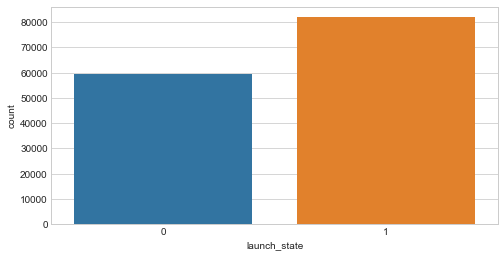

In [12]:
fig=plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [13]:
df.columns[0:14]

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design'],
      dtype='object')

In [14]:
df.drop(df.columns[10:], axis=1).drop(columns=['id','launched_at','category','country']).columns

Index(['launch_state', 'goal', 'backers_count', 'pledged_ratio',
       'funding_days', 'staff_pick'],
      dtype='object')

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



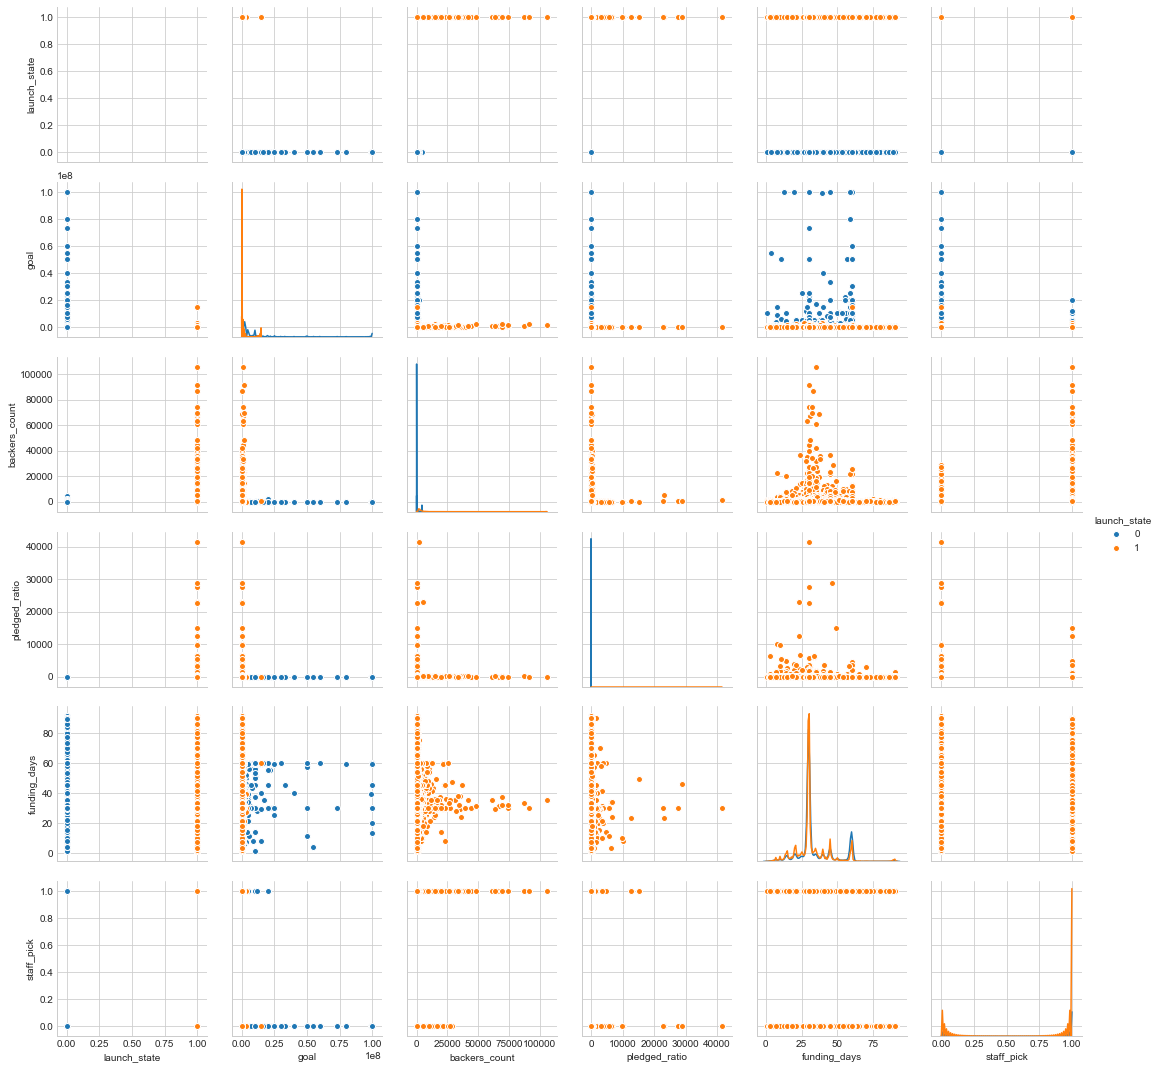

In [15]:
sns.set_style('whitegrid')
sns.pairplot(data=df.drop(df.columns[10:], axis=1).drop(columns=['id','launched_at','category','country']), 
             diag_kind='kde', hue='launch_state')

In [16]:
df.columns.values

array(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video',
       'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater', 'AF', 'AG', 'AL', 'AM',
       'AQ', 'AR', 'AT', 'AU', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF',
       'BG', 'BJ', 'BM', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA',
       'CD', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU',
       'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC',
       'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FO', 'FR', 'GA', 'GB',
       'GD', 'GE', 'GH', 'GL', 'GM', 'GN', 'GP', 'GQ', 'GR', 'GT', 'GU',
       'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ',
       'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KN', 'KP',
       'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LK', 'LR', 'LS', 'LT'

In [17]:
df.shape

(141447, 212)

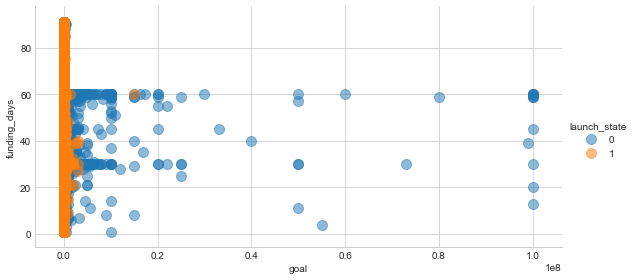

In [18]:
# funding_days vs goal
sns.set_style('whitegrid')
sns.lmplot("goal", "funding_days", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.5, 's':100}, size=4, aspect=2)

In [19]:
# It appears as if most of the huge goals fail

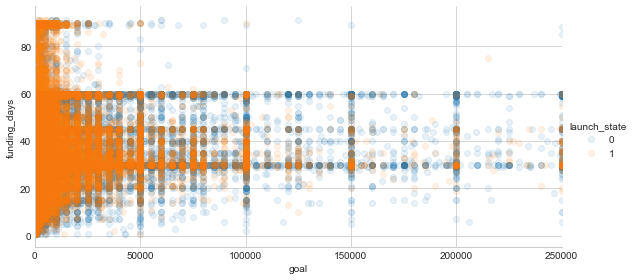

In [20]:
sns.set_style('whitegrid')
sns.lmplot("goal", "funding_days", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(xlim=(0,250000))

In [21]:
# There seems to be a better chance of success if the funding days and goal are both kept small

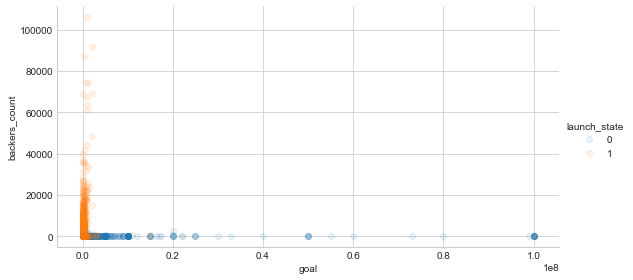

In [22]:
# backers_count vs goal
sns.set_style('whitegrid')
sns.lmplot("goal", "backers_count", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)

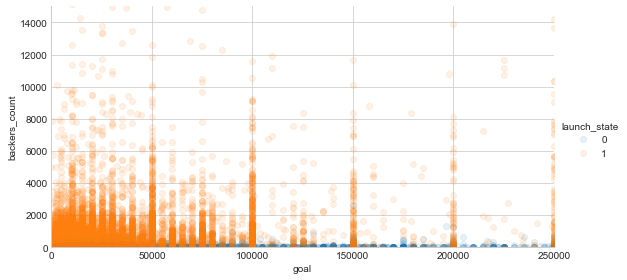

In [23]:
sns.set_style('whitegrid')
sns.lmplot("goal", "backers_count", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,250000), ylim=(0,15000))

In [24]:
# backers_count may not be a great indicator. It's obvious that if there 
# is a low number of backers then the project will more than likely fail. 
# Further, it's not a variable we can work with posteriori.

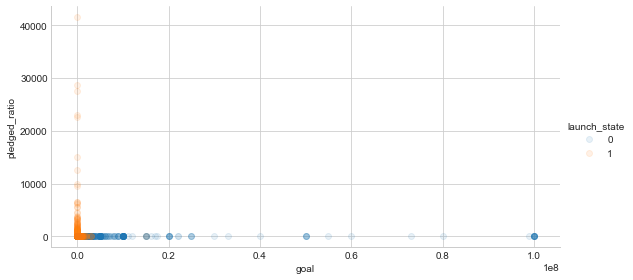

In [25]:
# pledged_ratio vs goal
sns.set_style('whitegrid')
sns.lmplot("goal", "pledged_ratio", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)

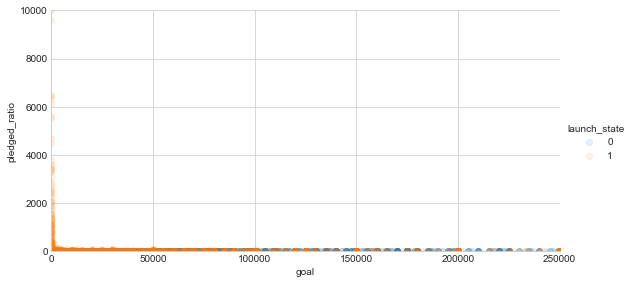

In [26]:
sns.set_style('whitegrid')
sns.lmplot("goal", "pledged_ratio", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,250000), ylim=(0,10000))

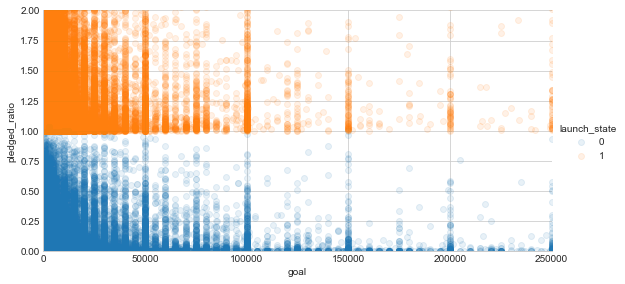

In [27]:
sns.set_style('whitegrid')
sns.lmplot("goal", "pledged_ratio", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,250000), ylim=(0,2))

In [ ]:
# Obviously a project is successful if it meets the goal
# and fails if it doesn't.

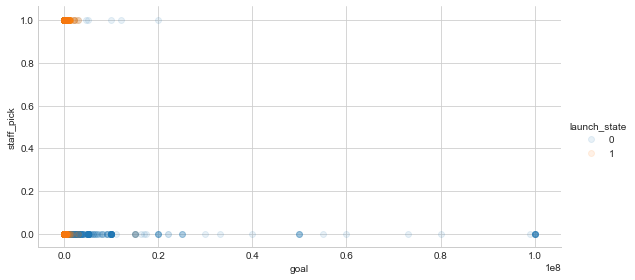

In [28]:
# staff_pick vs goal
sns.set_style('whitegrid')
sns.lmplot("goal", "staff_pick", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)

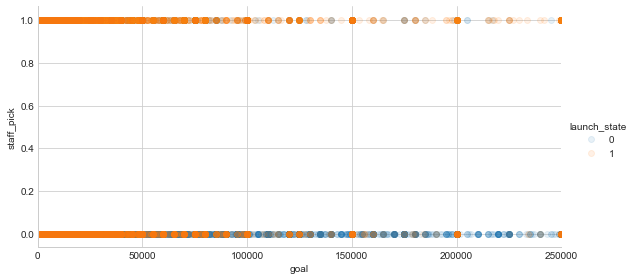

In [29]:
sns.set_style('whitegrid')
sns.lmplot("goal", "staff_pick", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2).set(
    xlim=(0,250000))

In [30]:
# launch_state vs staff_pick
df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).count()

staff_pick  launch_state
0           0        122333
1           1         19114

In [31]:
# Most projects do not get a staff pick

In [32]:
df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).count()['launch_state'][1] / (df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).count()['launch_state'][1] + df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).count()['launch_state'][0])

0.13513188685514715

In [33]:
df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).mean()

staff_pick  launch_state
0           0      0.530356
1           1      0.892592

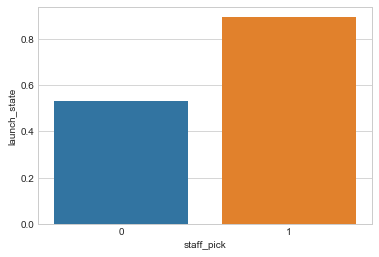

In [34]:
sns.barplot(data = df[['launch_state','staff_pick']].groupby(['staff_pick'], as_index=False).mean(), x='staff_pick', y='launch_state')

However, staff_pick does seem correlated with launch state
* 53% of projects without staff_pick succeed
* 89% of projects with staff_pick succeed

From https://www.kickstarter.com/blog/how-to-get-featured-on-kickstarter,
it appears as if projects are featured when they catch the eye of the
Kickstarter staff via creativity, a nice and visually appealing
site, etc. ie, they are NOT just picked due to them being funded well.

This is thus a good indicator - keep staff_pick!

In [35]:
df.drop(df.columns[10:], axis=1).drop(columns=['id','launched_at','category','country']).columns

Index(['launch_state', 'goal', 'backers_count', 'pledged_ratio',
       'funding_days', 'staff_pick'],
      dtype='object')

So what have we learned?
* goal - use it
* backers_count - do not use it (it's not known beforehand)
* pledged_ratio - do not use it (it's just an indicator of success)
* funding_days - use it
* staff_pick - use it

In [36]:
# Visualize categories

In [37]:
df.iloc[0:1,0:11]

launch_state         id         launched_at    category country    goal  \
0             0  895922629 2014-10-28 19:42:54  technology      US  3500.0   

   backers_count  pledged_ratio  funding_days  staff_pick  comics  
0              1       0.014286            30           0       0

In [38]:
df['launch_state'].unique()

array([0, 1], dtype=int64)

In [39]:
df_categories = df[['launch_state','category']].groupby(["category"]).describe().reset_index()
df_categories

category launch_state                                             
                        count      mean       std  min  25%  50%  75%  max
0            art      14131.0  0.561956  0.496164  0.0  0.0  1.0  1.0  1.0
1         comics       6189.0  0.817903  0.385956  0.0  1.0  1.0  1.0  1.0
2         crafts       4427.0  0.456291  0.498142  0.0  0.0  0.0  1.0  1.0
3          dance       2587.0  0.812138  0.390678  0.0  1.0  1.0  1.0  1.0
4         design       4913.0  0.648687  0.477429  0.0  0.0  1.0  1.0  1.0
5        fashion       8137.0  0.612511  0.487207  0.0  0.0  1.0  1.0  1.0
6   film & video      19084.0  0.590599  0.491736  0.0  0.0  1.0  1.0  1.0
7           food      11675.0  0.366681  0.481919  0.0  0.0  0.0  1.0  1.0
8          games       8919.0  0.618679  0.485738  0.0  0.0  1.0  1.0  1.0
9     journalism       3438.0  0.286213  0.452056  0.0  0.0  0.0  1.0  1.0
10         music      19503.0  0.672820  0.469196  0.0  0.0  1.0  1.0  1.0
11   photography       5321.0  0.514001  0.499851  0.0  0.0  1.0  1.0  1.0
12    publishing      13600.0  0.708897  0.454288  0.0  0.0  1.0  1.0  1.0
13    technology      14498.0  0.367085  0.482027  0.0  0.0  0.0  1.0  1.0
14       theater       5025.0  0.750647  0.432682  0.0  1.0  1.0  1.0  1.0

In [40]:
df_categories.sort_values(by=[('launch_state','mean')], ascending=False)

category launch_state                                             
                        count      mean       std  min  25%  50%  75%  max
1         comics       6189.0  0.817903  0.385956  0.0  1.0  1.0  1.0  1.0
3          dance       2587.0  0.812138  0.390678  0.0  1.0  1.0  1.0  1.0
14       theater       5025.0  0.750647  0.432682  0.0  1.0  1.0  1.0  1.0
12    publishing      13600.0  0.708897  0.454288  0.0  0.0  1.0  1.0  1.0
10         music      19503.0  0.672820  0.469196  0.0  0.0  1.0  1.0  1.0
4         design       4913.0  0.648687  0.477429  0.0  0.0  1.0  1.0  1.0
8          games       8919.0  0.618679  0.485738  0.0  0.0  1.0  1.0  1.0
5        fashion       8137.0  0.612511  0.487207  0.0  0.0  1.0  1.0  1.0
6   film & video      19084.0  0.590599  0.491736  0.0  0.0  1.0  1.0  1.0
0            art      14131.0  0.561956  0.496164  0.0  0.0  1.0  1.0  1.0
11   photography       5321.0  0.514001  0.499851  0.0  0.0  1.0  1.0  1.0
2         crafts       4427.0  0.456291  0.498142  0.0  0.0  0.0  1.0  1.0
13    technology      14498.0  0.367085  0.482027  0.0  0.0  0.0  1.0  1.0
7           food      11675.0  0.366681  0.481919  0.0  0.0  0.0  1.0  1.0
9     journalism       3438.0  0.286213  0.452056  0.0  0.0  0.0  1.0  1.0

In [41]:
df_categories.iloc[:,[0,2]]

category launch_state
                         mean
0            art     0.561956
1         comics     0.817903
2         crafts     0.456291
3          dance     0.812138
4         design     0.648687
5        fashion     0.612511
6   film & video     0.590599
7           food     0.366681
8          games     0.618679
9     journalism     0.286213
10         music     0.672820
11   photography     0.514001
12    publishing     0.708897
13    technology     0.367085
14       theater     0.750647

In [42]:
df.groupby('category', as_index=False).sum()

category  launch_state              id          goal  backers_count  \
0            art          7941  15282131206162  2.384475e+08         760455   
1         comics          5062   6502803182910  5.364431e+07        1217359   
2         crafts          2020   4754324641975  5.250022e+07         203433   
3          dance          2101   2794442240558  1.876906e+07         137602   
4         design          3187   5325327566352  2.966942e+08        1679867   
5        fashion          4984   8666524283931  1.475511e+08        1136498   
6   film & video         11271  20439629908805  2.066469e+09        1894107   
7           food          4281  12553301971564  6.057113e+08         789760   
8          games          5518   9609305684600  3.881361e+08        4802684   
9     journalism           984   3715559459799  2.054362e+08         177812   
10         music         13122  20937774137478  1.965684e+08        1271235   
11   photography          2735   5718553032283  7.034640e+07         315476   
12    publishing          9641  14735507755582  1.555235e+08        1519355   
13    technology          5322  15561599162526  1.388924e+09        4016540   
14       theater          3772   5362306379216  1.593698e+08         258910   

    pledged_ratio  funding_days  staff_pick  comics  crafts  dance  design  \
0    58428.381470        453426        1732       0       0      0       0   
1    68721.592031        199250        1704    6189       0      0       0   
2    20945.647237        136390         425       0    4427      0       0   
3     2649.545777         81956         574       0       0   2587       0   
4    17796.152234        161959         782       0       0      0    4913   
5    20023.738823        255006         856       0       0      0       0   
6    86232.478929        662395        2546       0       0      0       0   
7     9389.719266        391496        1382       0       0      0       0   
8    68482.149737        286793        1519       0       0      0       0   
9     2302.094063        115581         345       0       0      0       0   
10   45194.794303        683739        1515       0       0      0       0   
11    4859.651274        172490         833       0       0      0       0   
12   66218.766678        443580        2534       0       0      0       0   
13   68084.453902        506118        1760       0       0      0       0   
14    7243.527066        163747         607       0       0      0       0   

    fashion  film & video   food  games  journalism  music  photography  \
0         0             0      0      0           0      0            0   
1         0             0      0      0           0      0            0   
2         0             0      0      0           0      0            0   
3         0             0      0      0           0      0            0   
4         0             0      0      0           0      0            0   
5      8137             0      0      0           0      0            0   
6         0         19084      0      0           0      0            0   
7         0             0  11675      0           0      0            0   
8         0             0      0   8919           0      0            0   
9         0             0      0      0        3438      0            0   
10        0             0      0      0           0  19503            0   
11        0             0      0      0           0      0         5321   
12        0             0      0      0           0      0            0   
13        0             0      0      0           0      0            0   
14        0             0      0      0           0      0            0   

    publishing  technology  theater  AF  AG  AL  AM  AQ  AR  AT   AU  AX  AZ  \
0            0           0        0   1   1   0   0   2  20  14  157   0   0   
1            0           0        0   0   0   0   0   0   1   5  120   0   0   
2            0           0        0   0   0   0   1  

In [43]:
df.groupby('category', as_index=False).count()

category  launch_state     id  launched_at  country   goal  \
0            art         14131  14131        14131    14131  14131   
1         comics          6189   6189         6189     6189   6189   
2         crafts          4427   4427         4427     4427   4427   
3          dance          2587   2587         2587     2587   2587   
4         design          4913   4913         4913     4913   4913   
5        fashion          8137   8137         8137     8137   8137   
6   film & video         19084  19084        19084    19084  19084   
7           food         11675  11675        11675    11675  11675   
8          games          8919   8919         8919     8919   8919   
9     journalism          3438   3438         3438     3438   3438   
10         music         19503  19503        19503    19503  19503   
11   photography          5321   5321         5321     5321   5321   
12    publishing         13600  13600        13600    13600  13600   
13    technology         14498  14498        14498    14498  14498   
14       theater          5025   5025         5025     5025   5025   

    backers_count  pledged_ratio  funding_days  staff_pick  comics  crafts  \
0           14131          14131         14131       14131   14131   14131   
1            6189           6189          6189        6189    6189    6189   
2            4427           4427          4427        4427    4427    4427   
3            2587           2587          2587        2587    2587    2587   
4            4913           4913          4913        4913    4913    4913   
5            8137           8137          8137        8137    8137    8137   
6           19084          19084         19084       19084   19084   19084   
7           11675          11675         11675       11675   11675   11675   
8            8919           8919          8919        8919    8919    8919   
9            3438           3438          3438        3438    3438    3438   
10          19503          19503         19503       19503   19503   19503   
11           5321           5321          5321        5321    5321    5321   
12          13600          13600         13600       13600   13600   13600   
13          14498          14498         14498       14498   14498   14498   
14           5025           5025          5025        5025    5025    5025   

    dance  design  fashion  film & video   food  games  journalism  music  \
0   14131   14131    14131         14131  14131  14131       14131  14131   
1    6189    6189     6189          6189   6189   6189        6189   6189   
2    4427    4427     4427          4427   4427   4427        4427   4427   
3    2587    2587     2587          2587   2587   2587        2587   2587   
4    4913    4913     4913          4913   4913   4913        4913   4913   
5    8137    8137     8137          8137   8137   8137        8137   8137   
6   19084   19084    19084         19084  19084  19084       19084  19084   
7   11675   11675    11675         11675  11675  11675       11675  11675   
8    8919    8919     8919          8919   8919   8919        8919   8919   
9    3438    3438     3438          3438   3438   3438        3438   3438   
10  19503   19503    19503         19503  19503  19503       19503  19503   
11   5321    5321     5321          5321   5321   5321        5321   5321   
12  13600   13600    13600         13600  13600  13600       13600  13600   
13  14498   14498    14498         14498  14498  14498       14498  14498   
14   5025    5025     5025          5025   5025   5025        5025   5025   

    photography  publishing  technology  theater     AF     AG     AL     AM  \
0         14131       14131       14131    14131  14131  14131  14131  14131   
1          6189        6189        6189     6189   6189   6189   6189   6189   
2          4427        4427        4427     4427   4427   4427   4427   4427   
3          2587        2587        2587     2587   2587   2587   2587   2587   
4    

In [44]:
# dance success check
2101/2587

0.812137611132586

In [45]:
df_categories[('launch_state','mean')]

0     0.561956
1     0.817903
2     0.456291
3     0.812138
4     0.648687
5     0.612511
6     0.590599
7     0.366681
8     0.618679
9     0.286213
10    0.672820
11    0.514001
12    0.708897
13    0.367085
14    0.750647
Name: (launch_state, mean), dtype: float64

In [46]:
df_categories

category launch_state                                             
                        count      mean       std  min  25%  50%  75%  max
0            art      14131.0  0.561956  0.496164  0.0  0.0  1.0  1.0  1.0
1         comics       6189.0  0.817903  0.385956  0.0  1.0  1.0  1.0  1.0
2         crafts       4427.0  0.456291  0.498142  0.0  0.0  0.0  1.0  1.0
3          dance       2587.0  0.812138  0.390678  0.0  1.0  1.0  1.0  1.0
4         design       4913.0  0.648687  0.477429  0.0  0.0  1.0  1.0  1.0
5        fashion       8137.0  0.612511  0.487207  0.0  0.0  1.0  1.0  1.0
6   film & video      19084.0  0.590599  0.491736  0.0  0.0  1.0  1.0  1.0
7           food      11675.0  0.366681  0.481919  0.0  0.0  0.0  1.0  1.0
8          games       8919.0  0.618679  0.485738  0.0  0.0  1.0  1.0  1.0
9     journalism       3438.0  0.286213  0.452056  0.0  0.0  0.0  1.0  1.0
10         music      19503.0  0.672820  0.469196  0.0  0.0  1.0  1.0  1.0
11   photography       5321.0  0.514001  0.499851  0.0  0.0  1.0  1.0  1.0
12    publishing      13600.0  0.708897  0.454288  0.0  0.0  1.0  1.0  1.0
13    technology      14498.0  0.367085  0.482027  0.0  0.0  0.0  1.0  1.0
14       theater       5025.0  0.750647  0.432682  0.0  1.0  1.0  1.0  1.0

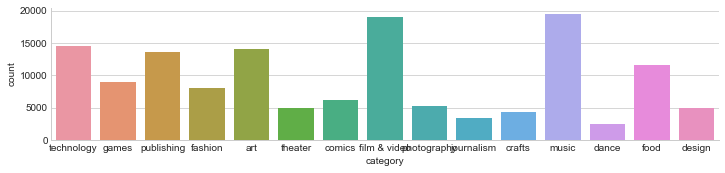

In [47]:
sns.factorplot(x='category', data=df, kind='count', size=2.5, aspect=4)

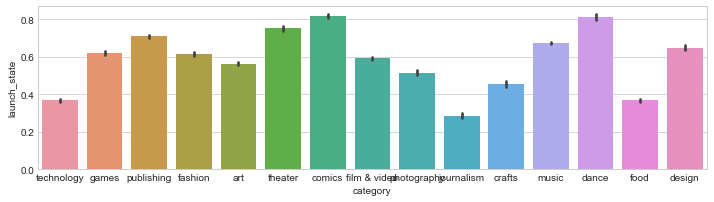

In [48]:
plt.figure(figsize=(12,3))
sns.barplot(x='category',y='launch_state',data=df)

In [49]:
df.pivot_table(values='launch_state', columns='category', index='goal', fill_value=0.5)

category           art  comics    crafts  dance    design   fashion  \
goal                                                                  
1.000000e-02  1.000000     0.5  0.500000    0.5  0.500000  0.500000   
1.000000e+00  0.800000     1.0  0.833333    0.5  1.000000  1.000000   
2.000000e+00  1.000000     1.0  1.000000    0.5  0.500000  0.500000   
3.000000e+00  1.000000     1.0  0.500000    0.5  0.500000  0.500000   
4.000000e+00  1.000000     0.5  0.500000    0.5  1.000000  0.500000   
5.000000e+00  0.923077     1.0  1.000000    1.0  1.000000  0.500000   
6.000000e+00  1.000000     0.5  0.500000    0.5  0.500000  0.500000   
7.000000e+00  1.000000     0.5  0.500000    1.0  0.500000  0.500000   
8.000000e+00  1.000000     1.0  0.500000    0.5  0.500000  0.500000   
9.000000e+00  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
1.000000e+01  0.687500     1.0  0.882353    0.5  1.000000  0.800000   
1.100000e+01  0.500000     0.5  0.500000    0.5  0.500000  1.000000   
1.200000e+01  0.600000     1.0  0.500000    0.5  0.500000  0.500000   
1.300000e+01  0.500000     1.0  0.500000    0.5  1.000000  1.000000   
1.400000e+01  1.000000     0.5  0.500000    0.5  1.000000  1.000000   
1.500000e+01  0.600000     1.0  1.000000    0.5  1.000000  1.000000   
1.600000e+01  1.000000     0.5  0.500000    0.5  0.500000  0.500000   
1.700000e+01  0.500000     0.5  0.500000    0.5  0.500000  1.000000   
1.800000e+01  0.500000     1.0  1.000000    0.5  0.500000  1.000000   
1.900000e+01  0.500000     1.0  0.500000    0.5  0.500000  0.500000   
2.000000e+01  0.740741     1.0  0.909091    0.5  1.000000  0.785714   
2.010000e+01  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
2.100000e+01  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
2.200000e+01  1.000000     0.5  1.000000    0.5  0.500000  1.000000   
2.300000e+01  0.500000     1.0  0.500000    0.5  0.500000  0.500000   
2.400000e+01  0.500000     1.0  0.500000    0.5  0.500000  1.000000   
2.500000e+01  0.857143     1.0  0.777778    0.5  0.866667  0.800000   
2.600000e+01  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
2.700000e+01  1.000000     0.5  1.000000    0.5  0.000000  0.500000   
2.800000e+01  0.500000     0.5  1.000000    0.5  1.000000  1.000000   
...                ...     ...       ...    ...       ...       ...   
6.500000e+06  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
6.500001e+06  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
6.914089e+06  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
7.000000e+06  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
7.300000e+06  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
7.500000e+06  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
8.000000e+06  0.500000     0.5  0.500000    0.5  0.000000  0.500000   
8.450000e+06  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
8.999999e+06  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
9.000000e+06  0.500000     0.5  0.500000    0.5  0.500000  0.000000   
1.000000e+07  0.000000     0.5  0.000000    0.5  0.000000  0.500000   
1.100000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
1.200000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
1.500000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.000000   
1.625000e+07  0.500000     0.5  0.500000    0.5  0.000000  0.500000   
1.700000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
1.740000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
2.000000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
2.200000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
2.500000e+07  0.500000     0.5  0.500000    0.5  0.000000  0.500000   
3.000000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
3.300000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
4.000000e+07  0.500000     0.5  0.500000    0.5  0.500000  0.500000   
5.000000e+07  0.000000  

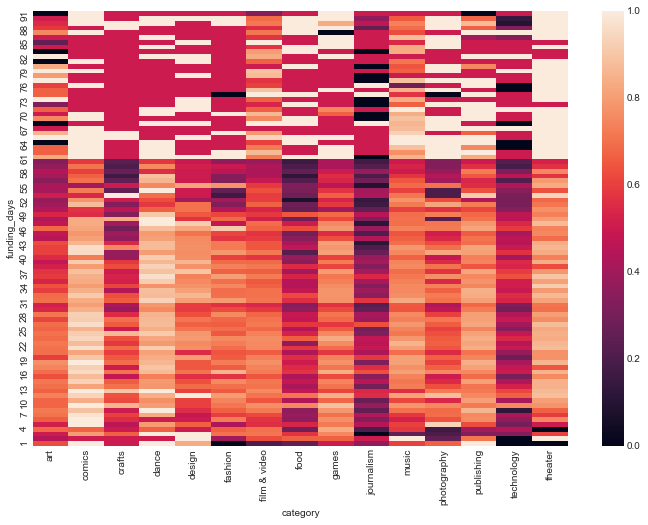

In [50]:
plt.subplots(figsize=(12,8))
ax = sns.heatmap(df.pivot_table(values='launch_state', columns='category', index='funding_days', 
                                fill_value=0.5), xticklabels=True)
ax.invert_yaxis()

In [51]:
# We see that some categories clearly do better than others.

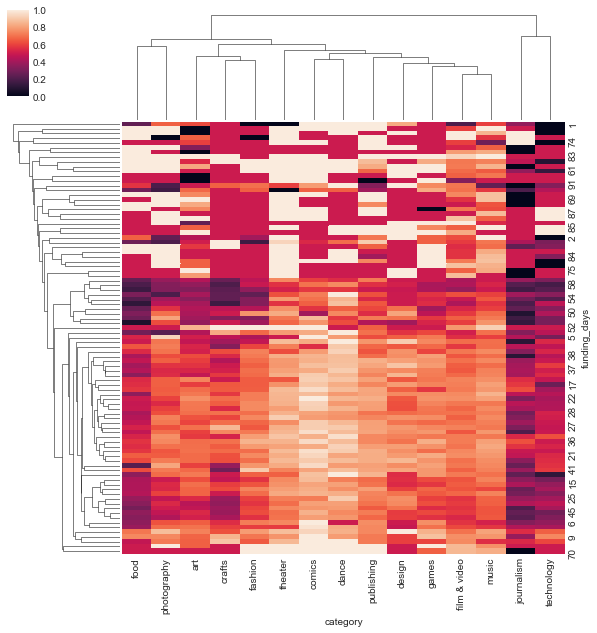

In [52]:
sns.clustermap(df.pivot_table(values='launch_state', columns='category', index='funding_days', fill_value=0.5))

In [53]:
# As already seen, there's not a lot of clustering to be done with funding_days. However, there is some clear clustering with the categories, eg journalism and technology seem to not be very successful.